# Recommender Systems I - Intro to Collaborative Filtering


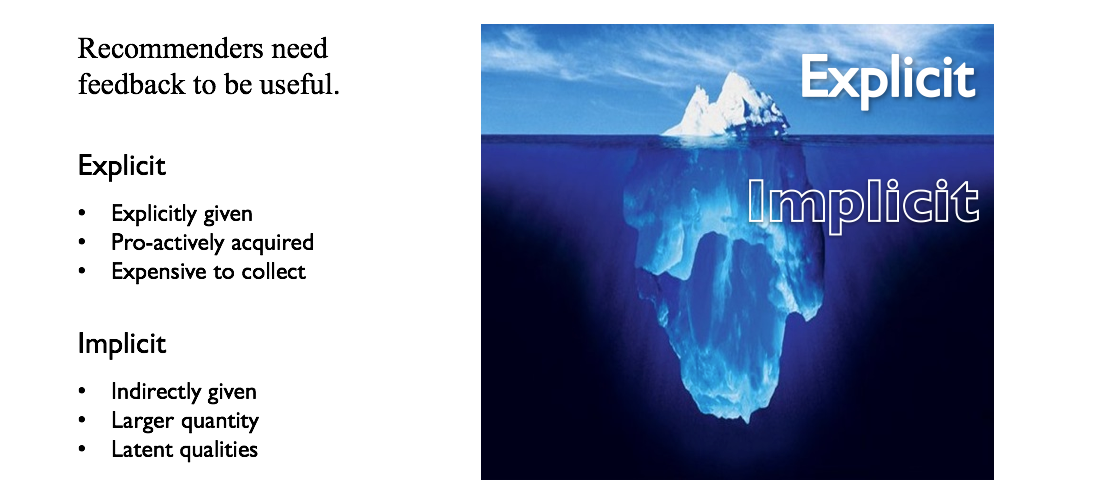

## Dot Product Review

By now this should be a familiar idea:

# $\vec A\cdot\vec B=A_xB_x+A_yB_y$


## Distance Metrics: Cosine Similarity

There are many distance metrics we can use to measure similarity between items or users.  One similarity metric we will use a bit in this lesson will bo cosine similarity.

## $$
cos(\theta) = \frac{A \cdot B}{\left\| A\right\| \left\| B\right\| } = \frac{A \cdot B}{\sqrt{\sum{A_i^2}} \cdot \sqrt{\sum{B_i^2}}}
$$


### Literal Example

$$
\vec{A} = \begin{bmatrix}
3 \ 2 \ \text{-}5
\end{bmatrix} \\
\vec{B} = \begin{bmatrix}
5 \ 3 \ \text{-}2
\end{bmatrix}
\\
$$

**The dot product of** $\vec{A} \cdot \vec{B}$

$$
\\
\begin{bmatrix}
3 \\ 2 \\ \text{-}5
\end{bmatrix} 
\cdot 
\begin{bmatrix}
5 \\ 3 \\ \text{-}2
\end{bmatrix}
= (3\times5) + (2\times3) + (-5\times-2) = 31
$$

<br>

**The sqrt of the magnitude of** $\sqrt{\left\| A\right\|}$ **multiplied by sqrt of the magnitude of** $\sqrt{\left\| B\right\|}$

$$
\sqrt{3^2 + 2^2 + \text{-}5^2}\times\sqrt{5^2 + 3^2 + \text{-}2^2} = 37
$$

<br>


> Result is approximate due to rounding decimal.  Check our Python example below for floating precicse cosine similarity.

**Cosine Similarity**

$$
cos(\theta) = \frac{31}{37} = .84
$$


In [1]:
import numpy as np

def cosine_simple(A, B):
    adotb = np.dot(A, B)
    magscale = np.sqrt(np.dot(A, A)) * np.sqrt(np.dot(B, B))
    return adotb / magscale

A = np.array([3,2,-5])
B = np.array([5,3,-2])

cosine_simple(A, B)

0.8157894736842107

#### sklearn cosine reference

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([A], [B])

array([[0.81578947]])

### Similarity on familiar data
Since we've been working with text recently, here's a basic example of applying cosine similarity to text data.

> **d** is closest to **a**.  You can also try changing the offset that gets assigned to _target_.  Try updating the sentence target to offset **2**, sentence **c**.

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd, numpy as np, seaborn as sns

sentences = [
    ("a", "Max and Ruby hang 10 at the beach"),
    ("b", "Max rides a skateboard"),
    ("c", "Skateboards are super cool, like Ruby"),
    ("d", "Max and Ruby teach at the beach")
]

In [4]:
df = pd.DataFrame(sentences, columns=["sample", "sentence"])
df = df.set_index("sample")
df

,sentence
sample,
a,Max and Ruby hang 10 at the beach
b,Max rides a skateboard
c,"Skateboards are super cool, like Ruby"
d,Max and Ruby teach at the beach


In [5]:
vect = CountVectorizer(stop_words=None)
X = vect.fit_transform(df['sentence']).toarray()
X

array([[1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1]])

In [6]:
df = pd.DataFrame(X, columns=vect.get_feature_names(), index=df.index)
df

,10,and,are,at,beach,cool,hang,like,max,rides,ruby,skateboard,skateboards,super,teach,the
sample,,,,,,,,,,,,,,,,
a,1,1,0,1,1,0,1,0,1,0,1,0,0,0,0,1
b,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
c,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0
d,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1


In [7]:
from sklearn.metrics import pairwise_distances
pairwise_distances(X, X, metric="euclidean")[3]

array([1.73205081, 2.82842712, 3.31662479, 0.        ])

## Common User-Item Collaborative Filtering:  Binary Preferences


In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt, seaborn as sns

from IPython.display import display

%matplotlib inline

In [9]:
users = [
    ("Chuck", 1, 1, 0, 0, 0, 0),
    ("Nancy", 1, 0, 0, 0, 1, 0),
    ("Divya", 0, 0, 0, 1, 1, 1),
    ("Pat", 0, 0, 1, 0, 1, 1),
]

users = pd.DataFrame(users, columns=["user", "Friday the 13th", "Nightmare on Elm St", "Dawn of the Dead", "Hiro Dreams of Sushi", "180 South", "Exit Through the Giftshop"])
users = users.set_index("user")
users

,Friday the 13th,Nightmare on Elm St,Dawn of the Dead,Hiro Dreams of Sushi,180 South,Exit Through the Giftshop
user,,,,,,
Chuck,1,1,0,0,0,0
Nancy,1,0,0,0,1,0
Divya,0,0,0,1,1,1
Pat,0,0,1,0,1,1


In [10]:
sim_matrix = cosine_similarity(users, users)
sim_matrix

array([[1.        , 0.5       , 0.        , 0.        ],
       [0.5       , 1.        , 0.40824829, 0.40824829],
       [0.        , 0.40824829, 1.        , 0.66666667],
       [0.        , 0.40824829, 0.66666667, 1.        ]])

In [11]:
sim_matrix = cosine_similarity(users, users)
users_sim = pd.DataFrame(sim_matrix, columns=users.index, index=users.index)

### User Similarity

Matplotlib is building the font cache using fc-list. This may take a moment.


Text(0.5, 1, 'User Cosine Similarity')

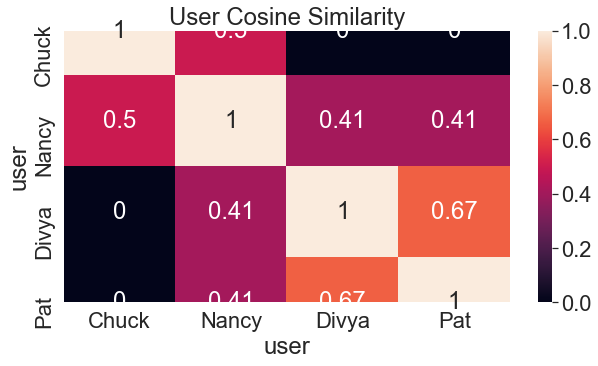

In [12]:
sim_matrix = cosine_similarity(users, users)
users_sim = pd.DataFrame(sim_matrix, columns=users.index, index=users.index)

sns.set(font_scale=1) 
sns.set(font_scale=2)
plt.figure(figsize=(10,5))
sns.heatmap(users_sim, annot=True)
plt.title("User Cosine Similarity")

In [13]:
users_sim.loc['Nancy'].sort_values(ascending=False)[1:]

user
Chuck    0.500000
Pat      0.408248
Divya    0.408248
Name: Nancy, dtype: float64

In [14]:
import pandas as pd

df = pd.read_csv('data/alcohol.csv')

In [15]:
df

,Unnamed: 0,Old Fashion,Manhattan,Negroni,Margarita,Martini,Whiskey Sour,Beer,Water,Soda Water,Screw Driver
0,Finn,2,5,NaN,1,5,4.0,5,5.0,2.0,NaN
1,Marina,2,2,NaN,2,4,NaN,4,5.0,NaN,1.0
2,Aman,5,2,3.0,3,5,4.0,3,5.0,3.0,NaN
3,Anita,5,3,3.0,1,5,3.0,1,5.0,NaN,5.0
4,Jordan,4,3,NaN,4,4,4.0,4,4.0,1.0,NaN
5,Ashley,2,2,1.0,3,2,5.0,5,5.0,NaN,2.0
6,Michael,2,2,3.0,3,2,1.0,5,5.0,5.0,NaN
7,Rittik,5,5,4.0,3,4,2.0,4,5.0,4.0,NaN
8,Brandon,5,5,5.0,5,5,5.0,1,NaN,NaN,4.0
9,Max,4,3,1.0,4,2,4.0,4,1.0,5.0,NaN


In [16]:
df = df.rename(columns={'Unnamed: 0': 'name'}).set_index('name')

In [17]:
df = df.fillna(0)

In [18]:
df

,Old Fashion,Manhattan,Negroni,Margarita,Martini,Whiskey Sour,Beer,Water,Soda Water,Screw Driver
name,,,,,,,,,,
Finn,2,5,0.0,1,5,4.0,5,5.0,2.0,0.0
Marina,2,2,0.0,2,4,0.0,4,5.0,0.0,1.0
Aman,5,2,3.0,3,5,4.0,3,5.0,3.0,0.0
Anita,5,3,3.0,1,5,3.0,1,5.0,0.0,5.0
Jordan,4,3,0.0,4,4,4.0,4,4.0,1.0,0.0
Ashley,2,2,1.0,3,2,5.0,5,5.0,0.0,2.0
Michael,2,2,3.0,3,2,1.0,5,5.0,5.0,0.0
Rittik,5,5,4.0,3,4,2.0,4,5.0,4.0,0.0
Brandon,5,5,5.0,5,5,5.0,1,0.0,0.0,4.0


In [19]:
df.index

Index(['Finn', 'Marina', 'Aman', 'Anita', 'Jordan', 'Ashley', 'Michael',
       'Rittik', 'Brandon', 'Max'],
      dtype='object', name='name')

In [20]:
np.round(cosine_similarity(df, df), 2)

array([[1.  , 0.87, 0.86, 0.73, 0.91, 0.86, 0.79, 0.86, 0.62, 0.77],
       [0.87, 1.  , 0.8 , 0.76, 0.86, 0.82, 0.78, 0.8 , 0.54, 0.6 ],
       [0.86, 0.8 , 1.  , 0.83, 0.92, 0.83, 0.86, 0.94, 0.76, 0.85],
       [0.73, 0.76, 0.83, 1.  , 0.76, 0.76, 0.61, 0.79, 0.82, 0.58],
       [0.91, 0.86, 0.92, 0.76, 1.  , 0.91, 0.78, 0.87, 0.74, 0.86],
       [0.86, 0.82, 0.83, 0.76, 0.91, 1.  , 0.76, 0.77, 0.68, 0.74],
       [0.79, 0.78, 0.86, 0.61, 0.78, 0.76, 1.  , 0.91, 0.53, 0.83],
       [0.86, 0.8 , 0.94, 0.79, 0.87, 0.77, 0.91, 1.  , 0.75, 0.86],
       [0.62, 0.54, 0.76, 0.82, 0.74, 0.68, 0.53, 0.75, 1.  , 0.71],
       [0.77, 0.6 , 0.85, 0.58, 0.86, 0.74, 0.83, 0.86, 0.71, 1.  ]])

In [21]:
sim = pd.DataFrame(
    np.round(cosine_similarity(df, df), 2),
    columns=df.index, 
    index=df.index)

sim

name,Finn,Marina,Aman,Anita,Jordan,Ashley,Michael,Rittik,Brandon,Max
name,,,,,,,,,,
Finn,1.00,0.87,0.86,0.73,0.91,0.86,0.79,0.86,0.62,0.77
Marina,0.87,1.00,0.80,0.76,0.86,0.82,0.78,0.80,0.54,0.60
Aman,0.86,0.80,1.00,0.83,0.92,0.83,0.86,0.94,0.76,0.85
Anita,0.73,0.76,0.83,1.00,0.76,0.76,0.61,0.79,0.82,0.58
Jordan,0.91,0.86,0.92,0.76,1.00,0.91,0.78,0.87,0.74,0.86
Ashley,0.86,0.82,0.83,0.76,0.91,1.00,0.76,0.77,0.68,0.74
Michael,0.79,0.78,0.86,0.61,0.78,0.76,1.00,0.91,0.53,0.83
Rittik,0.86,0.80,0.94,0.79,0.87,0.77,0.91,1.00,0.75,0.86
Brandon,0.62,0.54,0.76,0.82,0.74,0.68,0.53,0.75,1.00,0.71


In [22]:
sim.loc['Anita'].sort_values(ascending=False)[1:]

name
Aman       0.83
Brandon    0.82
Rittik     0.79
Ashley     0.76
Jordan     0.76
Marina     0.76
Finn       0.73
Michael    0.61
Max        0.58
Name: Anita, dtype: float64

In [23]:
alcohol = list(df.loc['Jordan'][df.loc['Jordan'] == 1].index)

In [24]:
alcohol

['Soda Water']

In [25]:
tried = list(df.loc['Finn'][df.loc['Finn'] == 5].index)

In [26]:
tried

['Manhattan', 'Martini', 'Beer', 'Water']